# Geopandas - Mapas

GeoPandas es una librería que brinda soporte a datos geográficos usando Pandas. Implementa dos tipos de datos derivados de pandas.Series y pandas.DataFrame (**GeoSeries** y **GeoDataFrame**). Las operaciones geométricas soportadas por Geopandas son cartesianas.

Para la realización de este Notebook se requiere la instalación de `geopandas`, `descartes` and `pysal` desde el PROMPT

```bash
conda install geopandas
conda install descartes
conda install pysal
```

In [1]:
%matplotlib inline

import ogr  # GDAL/OGR
import shapely #figuras, poligonos Polygon utilizar: pip install shapely
from shapely.geometry import *
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

## GeoSerie

In [2]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = gpd.GeoSeries([p1, p2, p3])

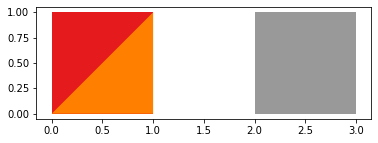

In [3]:
g.plot(cmap='Set1')

Acabamos de definir un elemento de tipo `GeoSeries`. Una `GeoSeries` es un vector donde cada entrada corresponde a un conjunto de figuras que corresponden a una observación. Una entrada puede consistir de solo una figura (Un simple polígono o punto) o de múltiples figuras que se entienden como una observación (Por ejemplo, el conjunto de polígonos que forman las islas de San Andrés y Providencia). 

`Geopandas` soporta los siguientes tipos de objetos geométricos:

- Points / Multi-Points [Documentación](http://toblerity.org/shapely/manual.html#points)
- Lines / Multi-Lines [Documentación](http://toblerity.org/shapely/manual.html#linestrings)
- Polygons / Multi-Polygons [Documentación](http://toblerity.org/shapely/manual.html#polygons)

Cada uno de estos objetos son a su vez objetos de la librería `shapely`. 

### Atributos

`shapely` nos permite ejecutar operaciones como:

In [4]:
g.area

0    1.0
1    0.5
2    1.0
dtype: float64

In [5]:
g.bounds

,minx,miny,maxx,maxy
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,2.0,0.0,3.0,1.0


In [6]:
g.geom_type

0    Polygon
1    Polygon
2    Polygon
dtype: object

### Métodos básicos

In [7]:
# Distancia entre elementos

print(p1.distance(p3))

1.0


In [8]:
print(g.distance(p3)) #distancia del centro de cada poligono a p3

0    1.0
1    1.0
2    0.0
dtype: float64


In [9]:
g.centroid

0    POINT (0.50000 0.50000)
1    POINT (0.66667 0.33333)
2    POINT (2.50000 0.50000)
dtype: geometry

In [10]:
g.representative_point() 
# A diferencia de centroid, regresa un punto representativo que está garantizado, 
# se encuentra dentro de la geometría

0    POINT (0.50000 0.50000)
1    POINT (0.75000 0.50000)
2    POINT (2.50000 0.50000)
dtype: geometry

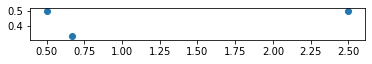

In [11]:
g.centroid.plot()

### Pruebas de relación

In [12]:
# Compara si la figura de un objeto geométrico es casi igual
g.geom_almost_equals(p3)

0    False
1    False
2     True
dtype: bool

In [13]:
# Regresa verdadero si una figura está contenida en otra
p1.contains(p2)

True

In [14]:
p2.contains(p1)

False

In [15]:
# Regresa verdadero si una figura está intersectada con otra
p1.intersects(p2)

True

## GeoDataFrame

Un `GeoDataFrame` es una estructura de datos tabular que contiene una columna de tipo `GeoSeries`. 

Los `GeoDataFrames` siempre contienen una columna que se denomina geometría (`geometry`). Cuando una operación espacial es aplicada al `GeoDataFrame`, este comando siempre actuará sobre la columna `geometry`. La columna `geometry` podría tener un nombre diferente, el cual puede ser consultado usando `gdf.geometry.name`.

A continuación se presenta un ejemplo usando `GeoDataFrame`:

In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [17]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

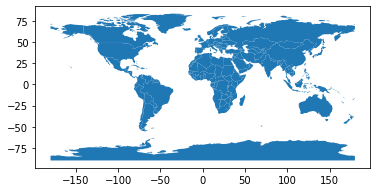

In [18]:
world.plot()

In [19]:
world.geometry.name

'geometry'

In [20]:
world['centroid_column'] = world.centroid # Nueva columna con el centroide de cada país
world = world.set_geometry('centroid_column') # Aquí cambiamos la columna geometry a la columna centroid_column
print(world.geometry.name) 

centroid_column


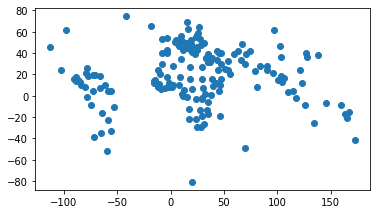

In [21]:
world.plot()

# Cargando datos

`gpd.read_file` permite la carga de conjuntos de datos a través de la libería `fiona`. `fiona` soporta una gran cantidad de formatos, entre ellos GeoJSON. `gpd.read_file` regresa automáticamente un `GeoDataFrame`.

In [22]:
df_bogota = gpd.read_file('data/bogota_cadastral.json')

In [23]:
df_bogota.head()

,cartodb_id,scacodigo,scatipo,scanombre,shape_leng,shape_area,MOVEMENT_ID,DISPLAY_NAME,geometry
0,12,004575,0,LOS LAURELES,0.027741,0.000037,1,"LOS LAURELES, 004575 (1)","MULTIPOLYGON (((-74.20029 4.61725, -74.20028 4..."
1,26,006524,0,LA MAGDALENA,0.053219,0.000089,2,"LA MAGDALENA, 006524 (2)","MULTIPOLYGON (((-74.16276 4.66008, -74.16272 4..."
2,45,102502,1,EL UVAL RURAL,0.171333,0.000708,3,"EL UVAL RURAL, 102502 (3)","MULTIPOLYGON (((-74.11931 4.49017, -74.11933 4..."
3,74,005501,0,PALO BLANCO,0.017187,0.000018,4,"PALO BLANCO, 005501 (4)","MULTIPOLYGON (((-74.09353 4.68101, -74.09481 4..."
4,77,009240,0,POTRERILLO,0.010527,0.000007,5,"POTRERILLO, 009240 (5)","MULTIPOLYGON (((-74.09744 4.73531, -74.09620 4..."


`GeoPandas` permite la indexación y selección de datos de la misma forma que pandas, a través de `.loc` e `.iloc`. Por ejemplo si queremos filtrar aquellas áreas mayores a 0.0006, lo podemos hacer de la siguiente manera:

In [24]:
df_bogota_large = df_bogota.loc[df_bogota.shape_area > 0.0006]

print(df_bogota_large.count())
print(df_bogota.count())

cartodb_id      42
scacodigo       42
scatipo         42
scanombre       42
shape_leng      42
shape_area      42
MOVEMENT_ID     42
DISPLAY_NAME    42
geometry        42
dtype: int64
cartodb_id      1160
scacodigo       1160
scatipo         1160
scanombre       1160
shape_leng      1160
shape_area      1160
MOVEMENT_ID     1160
DISPLAY_NAME    1160
geometry        1160
dtype: int64


Adicionalmente nos permite hacer una selección de índices basado en coordenadas (`.cx`)

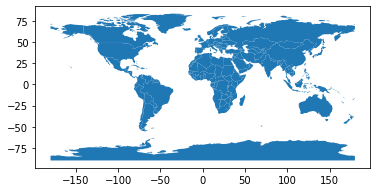

In [25]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot()

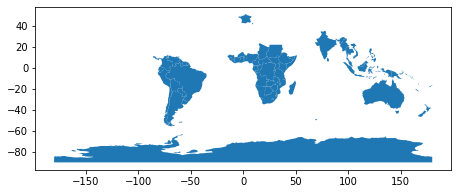

In [26]:
hemisferio_sur = world.cx[:, :10]

hemisferio_sur.plot(figsize=(10, 3));

# Generando mapas

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

`GeoPandas` pinta los mapas usando matplotlib como soporte. Por lo tanto cualquier atributo que se modifique en pyplot, tambien se puede modificar en `.plot`. Por ejemplo:

(-197.99999999999997, 198.00000000000006, -98.6822565, 92.32738650000002)

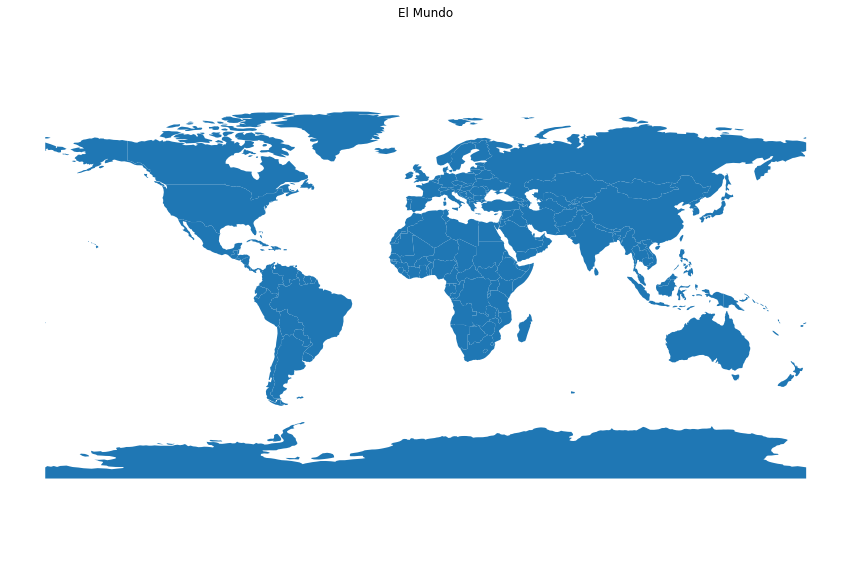

In [28]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title(u'El Mundo')

# Carga la configuración que hayamos generado en el elemento ax
world.plot(ax=ax)

# Eliminamos los ejes
ax.set_axis_off()
plt.axis('equal')

### Mapas coropléticos

Para elaborar un mapa cloroplético, basta con indicar la columna sobre la cual se van a clasificar los datos:

In [29]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


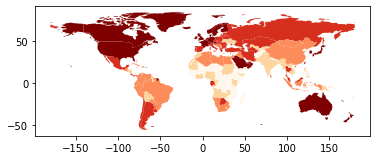

In [30]:
world = world[(world['pop_est']>0) & (world['name']!="Antarctica")] # Eliminamos Antarctica
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est'] # Creamos una nueva columna: PIB per cápita
#world['gdp_per_cap'] = world.gdp_md_est / world.pop_est # Creamos una nueva columna: PIB per cápita

world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles') # Creamos un mapa coroplético sobre gdp_per_cap

# Agregación usando `dissolve`

Es común que los datos espaciales que estemos manejando tengan un nivel de granularidad mayor del que necesitamos. Por ejemplo podemos tener información de los estratos a nivel de manzana en una ciudad, pero estamos interesados en estudiar patrones a nivel de UPZ, barrios o localidades. En caso de trabajar con datos no espaciales, la función `groupby` se ajusta a las necesidades mencionadas. Sin embargo, `GeoPandas` provee una función que agrega características geométricas a través de la función `dissolve`.

`dissolve` trabaja así: 
1. Si dos polígonos conjuntos comparten un grupo (Por ejemplo estrato), ambos son fusionados en un solo polígono o característica geométrica.
2. Los datos relacionados a cada polígono son agregados usando la función `groupby.aggregate()`
3. Combina tanto (1) como (2)

En el siguiente ejemplo combinaremos países para formar continentes. Y luego visualizaremos la información de población total, usando un mapa cloroplético:

In [31]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
world.head(10)

,continent,geometry,pop_est
0,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",920938
1,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",53950935
2,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",603253
3,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",35623680
4,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",326625791
5,Asia,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",18556698
6,Asia,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",29748859
7,Oceania,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",6909701
8,Asia,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",260580739
9,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",44293293


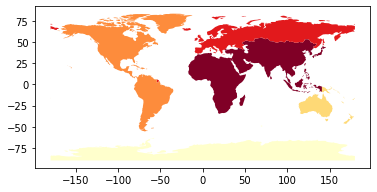

In [32]:
continents = world.dissolve(by='continent', aggfunc='sum') #Escogemos la columna de agregación y la operación de agregación

continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd');

In [33]:
continents

,geometry,pop_est
continent,,
Africa,"MULTIPOLYGON (((49.544 -12.470, 49.809 -12.895...",1219176238
Antarctica,"MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...",4050
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...",4389144868
Europe,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",746398461
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...",573042112
Oceania,"MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...",36782844
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...",140
South America,"MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...",418540749


# Fusionando datos

[Documentación](http://geopandas.org/mergingdata.html)

Existen dos maneras de combinar conjuntos de datos en geopandas. *Uniones de atributos* o *uniones espaciales*. 

En una unión de atributos, un `GeoSeries` o `GeoDataFrame` es combinado con un Series o DataFrame de pandas usando una variable en común. Esta operación es análoga a `pd.merge`, sin embargo si se hace usando pandas, el resultado será un DataFrame de pandas y no un `GeoDataFrame`.

En una unión espacial, todas las observaciones de un `GeoSeries` o `GeoDataFrame` son combinadas con base a una relación espacial establecida entre ellas. A continuación presentamos un ejemplo de una unión espacial. Tenemos la información de las ciudades y en otro `GeoDataFrame` tenemos la información de los países. Usamos una unión espacial para fusionar ambas fuentes de datos:

In [34]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries = world[['geometry', 'name']]

countries = countries.rename(columns={'name':'country'})

In [35]:
countries.head()

,geometry,country
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


In [36]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [37]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", op='intersects') #sjoin spacial join

cities_with_country.head(30)

,name,geometry,index_right,country
0,Vatican City,POINT (12.45339 41.90328),141,Italy
1,San Marino,POINT (12.44177 43.93610),141,Italy
192,Rome,POINT (12.48131 41.89790),141,Italy
2,Vaduz,POINT (9.51667 47.13372),114,Austria
184,Vienna,POINT (16.36469 48.20196),114,Austria
3,Luxembourg,POINT (6.13000 49.61166),128,Luxembourg
8,Monaco,POINT (7.40691 43.73965),43,France
11,Andorra,POINT (1.51649 42.50000),43,France
199,Paris,POINT (2.33139 48.86864),43,France
12,Port-of-Spain,POINT (-61.51703 10.65200),175,Trinidad and Tobago


### IMPORTANTE

`gpd.sjoin` soporta varias funciones de unión aparte de `intersects`. También soporta `within` y `contains`. Estas funciones se estudiaron en [Pruebas-de-relación](#Pruebas-de-relación)